<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_5_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Что представляет из себя разведочный анализ данных?**

Разведочный анализ данных - это процесс исследования и изучения набора данных с целью выявления основных закономерностей, аномалий, корреляций и других полезных характеристик. Этот вид анализа обычно проводится на начальных этапах работы с данными, когда основная цель - получить представление о структуре и свойствах данных для последующего принятия решений о том, как их обрабатывать и моделировать.

Разведочный анализ может включать в себя различные методы и инструменты, такие как визуализация данных (графики, диаграммы, тепловые карты), описательная статистика (меры центральной тенденции, меры разброса, ковариация и корреляция), а также использование алгоритмов машинного обучения для выявления скрытых закономерностей и зависимостей.

В результате разведочного анализа исследователь получает информацию о данных, которая затем может быть использована для определения целей и задач дальнейшего анализа, выбора методов моделирования и оценки результатов. Такой анализ помогает лучше понять данные, что, в свою очередь, позволяет принимать более обоснованные решения и повышать эффективность дальнейшей работы с ними.

**2.Какая основная библиотека Python используется для анализа данных этим способом?**

Сейчас самой объёмной и полной библиотекой является Pandas profiling.

Но в целом для анализа данных в Python используется множество библиотек. Некоторые из наиболее популярных включают Pandas, NumPy, SciPy, Matplotlib, Seaborn, Scikit-Learn и TensorFlow. Однако, какой именно набор библиотек будет использоваться для анализа данных, зависит от конкретной задачи и предпочтений разработчика.

**3.Опишите своими словами процесс анализа данных в соответствии с тем, что рассказывает спикер.**

 **Разведочный анализ данных**
 будем исследовать набор данных по погоде для здания id=0.


устанавливаем Pandas profiling - основная библиотека для разведки

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# загружаем библиотеки
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16,8


загружаем данные из scv, формируем data для одного здания

In [ ]:
data = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz")

In [ ]:
data = data.loc[data['site_id']==0]
data.head()

замечаем, что многие данные "гряные".далее визуализируем зависимость температуры воздуха от даты/времени

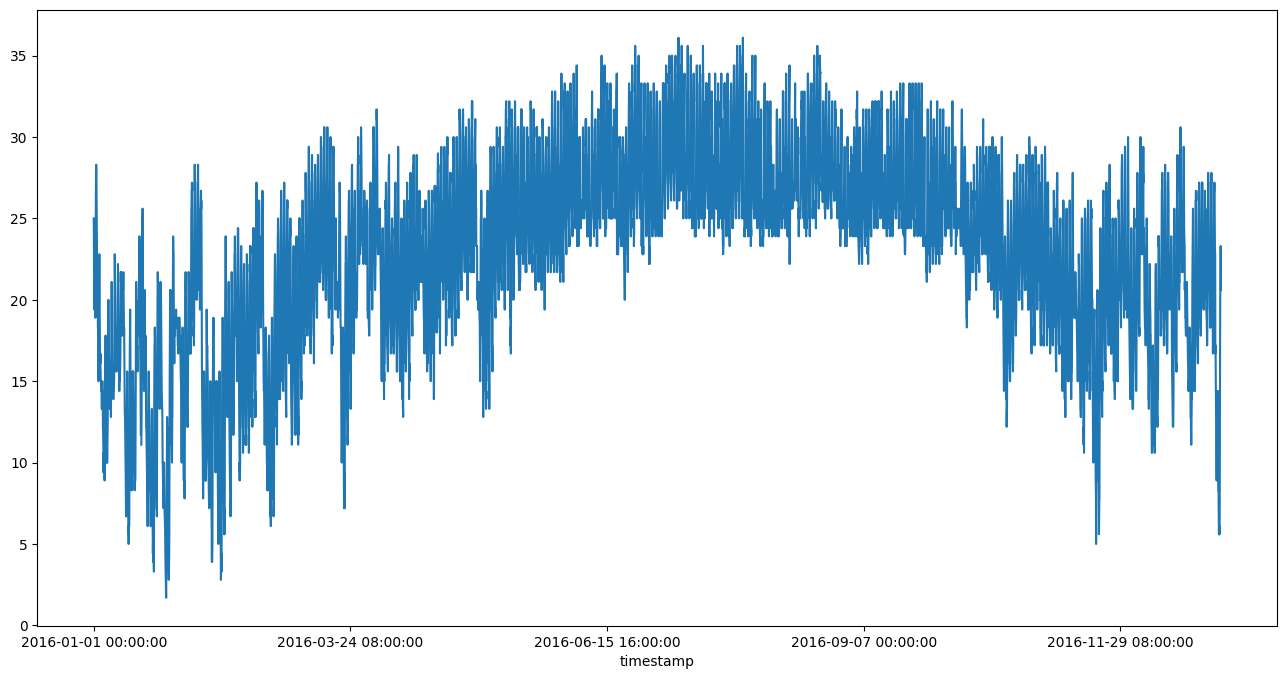

In [ ]:
data.set_index("timestamp")["air_temperature"].plot()
plt.show()

замечаем, что данные ложаться в почти нормальное распределение. На температуру можем положиться для регрессионного анализа

**Исследуем данные**
используем pandas describe

In [ ]:
data.describe()

далее исследуем по каждй переменной кол-во, уникальных значений (count) , среднее значение (mean) , среднеквадратичное отклонение (std)  , перрцентили и  минимальные/максимальные. Замечаем, что выпадение осадков (precip_depth_1_hr) надо корректировать (min = -1? испарилась); с давлением все более или менее хорошо (достаточно маленькое стандартное отклонение); направление ветра выражено в градусах и стандартное отклонение почти половина максимального значания(ветер дует в разные стороны одновременно?) - необходимо преобразовать; сила ветра колеблется в небольшх пределах, как и точка росы и облачность. Пока разведочный анализ данных показывает, что опираться можем на температуру и давление, с отстальными нужно работать

In [ ]:
# используем инструмент pandas profiling
pandas_profiling.ProfileReport(data, explorative = True)

данный иснтрумент позволяет провести более профессиональный анализ каждой переменной, корреляции между ними, модели распределния и т.д.

**4. Задание спикера**

найти не менее двух "утечек" (зависимостей в данных), которые позволяют более точнее предсказать энергопотребление

Для более точного прогнозирования энергопотребления можно использовать различные факторы или зависимости в данных. Вот две потенциальные “утечки” или зависимости, которые могут улучшить точность моделей прогнозирования энергопотребления:

Зависимость от температуры: Температура является важным фактором, влияющим на энергопотребление. Например, в холодную погоду людям нужно больше энергии для отопления своих домов, а в жаркую погоду - для охлаждения. Учет колебаний температуры также может повысить точность прогнозирования энергопотребления.

Завсимость от точки росы: Точка росы — это значение температуры, при которой водяные пары, находящиеся в воздухе, конденсируют в росу. Этот показатель зависит от нескольких факторов. Ключевым является давление воздуха внутри строения и на улице и влажность в помещении. Поскольку это интегральный показатель мы смело можем указать его вторым номером.

Эти зависимости могут быть включены в модель прогнозирования энергопотребления путем добавления соответствующих переменных.

Для этого обьединим по полю "timestamp" два датфрейма data и data_toe,
и проанализируем получишийся дата фрейм  с помощью pandas profiling

In [ ]:
dаta_toe = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")


In [ ]:
dаta_toe.info()

In [ ]:
data.info()

в обоих фреймах 8784 уникальных значений по полям 'timestamp'

In [ ]:
data_marge = pd.merge(data,dаta_toe, on='timestamp')
data_marge.head()

In [ ]:
# используем инструмент pandas profiling
pandas_profiling.ProfileReport(data_marge, explorative = True)

по корреляции с meter_reading видим:
- 0.683 прямая зависимость с температурой наружного воздуха
- 0,711 сильная прямая зависимость от точки росы  

**5.Что представляет из себя процесс ETL?**

ETL (извлечение, преобразование, загрузка) - это процесс обработки данных, который включает в себя извлечение данных из различных источников (таких как базы данных, файлы, API и т.д.), их преобразование (при необходимости) и загрузку в целевое хранилище для дальнейшего анализа.

Этот процесс обычно используется для объединения данных из разных систем или источников в единую базу данных для последующего анализа. Он позволяет преобразовывать данные в формат, удобный для использования в аналитических инструментах, и обеспечивает их качество, полноту и согласованность перед загрузкой.

ETL-инструменты помогают автоматизировать этот процесс, что позволяет ускорить время обработки данных и повысить эффективность работы с ними.